ret2 160.0


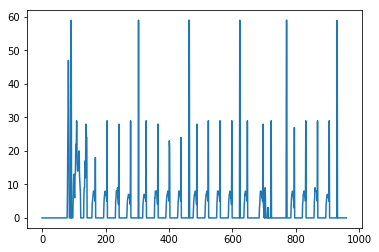

(array([ 83,  92, 304, 463, 464, 623, 770, 771, 930], dtype=int64),)
[[  9 212 159   1 159 147   1 159]]
[  1   9 212 159   1 159 147   1 159]
measures [ 92 304 463 623 770 930]


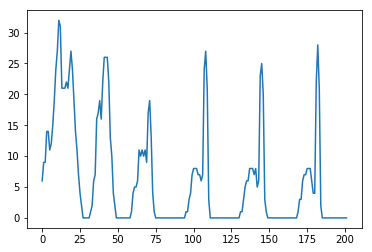

Seg Count Res
[ 24.  38.  52.  57.  60.  66.  71.  81.  97. 117. 133. 135. 132. 126.
 116. 106. 109. 115. 118. 115. 108.  95.  75.  55.  38.  24.  13.   6.
   2.   0.   1.   3.   9.  16.  32.  48.  65.  75.  90. 100. 109. 116.
 122. 113.  97.  75.  51.  29.  16.   6.   2.   0.   0.   0.   0.   0.
   0.   1.   5.  10.  15.  21.  31.  37.  43.  48.  53.  51.  58.  66.
  69.  62.  54.  37.  18.   5.   1.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   5.   9.  16.
  23.  30.  35.  38.  38.  36.  35.  51.  71.  85.  82.  75.  51.  24.
   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   2.   5.  10.  16.  21.  28.  33.  36.  37.  39.
  36.  34.  49.  67.  79.  77.  72.  49.  24.   4.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   4.   7.  13.  20.  26.  31.  36.  38.  37.  34.  30.  44.  64.  79.
  77.  73.  51.  23.   2.   0.   0.   0.   0.   0.   0.   0.   

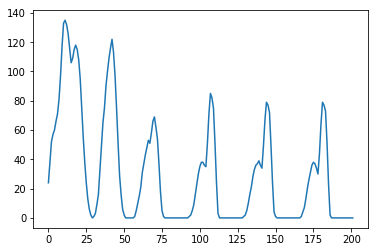

202


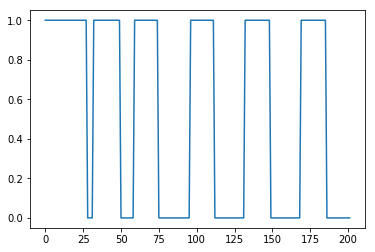

IndexError: index 11 is out of bounds for axis 0 with size 11

In [23]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

img = cv2.imread('ode_to_joy.jpg',0)
height, width = img.shape[:2]
path = 'E:/NITK/Projects/Optical Music Recogniton/'

"""Resizing image"""
img_res = cv2.resize(img,(int(0.5*width), int(0.5*height)))#, interpolation = cv.INTER_CUBIC)


#cv2.imshow('img_resize', img_res)
"""Otsu Binarisation"""
ret2,th2 = cv2.threshold(img_res,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2', ret2)
#cv2.imshow('thresh', th2)

"""Canny Edge Detection"""
edges = cv2.Canny(th2,50,150,apertureSize = 3)

"""Erosion - to get only the horizontal lines
    Subtract erosion from edges to remove the staff lines"""
kernel = np.ones((1,5), np.uint8)

erosion = cv2.erode(edges, kernel, iterations = 1)
erosion_copy = erosion

#cv2.imshow('erosion', erosion)

result = cv2.subtract(edges, erosion)
#cv2.imshow('result', result)

"""To find the y-values of staff lines"""
sum_rows = np.sum(erosion, axis=1)
max_sum = np.amax(sum_rows)

ind = np.where(sum_rows > 0.7 * max_sum)
new_ind = ind[0][::2] + 1  ## contains y-values of staff lines

ref_ind = new_ind[::5] ## Reference value for each set of 5 staff lines
ref_ind2 = new_ind[4::5]
bw = cv2.bitwise_not(th2)
horizontal = bw.copy()
vertical = bw.copy()
cv2.waitKey(0)
cv2.destroyAllWindows()

    #Staff line thickness
from collections import Counter
ind = ind[0][:]
a = [x - ind[i-1] for i,x in enumerate(ind)][1:]
data = Counter(a)
b = data.most_common(1)
slt = b[0][0] #slt is staff line thickness
    #slt

    #Removing the horizontal lines
kernel_v = np.ones((2*slt,1),dtype = np.uint8)
bw_erode1 = cv2.erode(vertical,kernel_v,iterations = 1)
bw_dilate1 = cv2.dilate(bw_erode1,kernel_v,iterations = 1)
#cv2.imshow('bw_dilate',bw_dilate1)
 

vertical_not = cv2.bitwise_not(bw_dilate1) #vertical
#cv2.imshow('not',vertical_not)
#cv2.imshow('bw_dilate',bw_dilate1)
smooth = vertical_not.copy()
blur1 = cv2.filter2D(smooth,-1,(np.ones((2,1),np.float32)/2))
#cv2.imwrite('C:/Users/Sahith/Desktop/IEEE Sheet Vision/staff_removal.jpg',blur1)
#cv2.imshow('a',blur1)
#cv2.waitKey(0)
#cv2.destroyAllWindows()    

final_image1 = ~blur1
final_image = final_image1 + result

cv2.imshow('a',result)

cv2.imshow('b',final_image)
cv2.waitKey(0)
cv2.destroyAllWindows() 
######################################
########### New code : ##############
####################################

# Projecting on y
count = np.zeros(960)

for i in range(55,125):
    for j in range(960):
        #if(result2[i][j]==255):
        if(blur1[i][j]==0):
            count[j]=count[j]+1

#cv2.imshow('result2', result2)

"""count2 = np.zeros(225-125) 

for i in range(125,225):
    for j in range(624,659):
        if(result2[i][j]==0):
            count2[i-125] = count2[i-125] + 1"""


########################################
plt.plot(count)
plt.show()

measures1 = np.where(count>40)
print(measures1)
meas_diff1 = np.diff(measures1)
print(meas_diff1)
meas_diff = np.insert(meas_diff1[0], 0, 1) 
print(meas_diff)

measures = np.delete(measures1, np.where(meas_diff < width/300))
print('measures',measures)

for i2 in np.arange(0,len(measures)-1):
    origin_measure = measures[i2]+5
    end_measure = measures[i2+1] - 5
    #CHANGE THESE values based on staff lines positions
    seg_y_top = 50 
    seg_y_bottom = 130
    ###########
    img_seg_meas = final_image[seg_y_top:seg_y_bottom, origin_measure:end_measure]
    cv2.imshow('segmented',img_seg_meas)


    # Hardcoded now for the origin, CHANGE LATER!!!!!!

    # Extract the individual components in each measure
    #print('notespos',note_pos)

    height_seg,width_seg = np.shape(img_seg_meas)
    seg_count = np.zeros(width_seg)
    for i in range(height_seg):
        for j in range(width_seg):
            #if(result2[i][j]==255):
            if(img_seg_meas[i][j]==255):
                seg_count[j]=seg_count[j]+1

    plt.plot(seg_count)
    plt.show()

    #smoothen a little

    seg_count_result = np.convolve(seg_count,np.ones(5),mode = 'same')

    print("Seg Count Res")
    print(seg_count_result)
    plt.plot(seg_count_result)
    plt.show()

    #set threshold to find gaps
    seg_count_positions = np.zeros(width_seg)
    print(width_seg)
    for i in range(width_seg):
        if(seg_count_result[i]>5):  #give 3 as threshold
            seg_count_positions[i] = 1

    plt.plot(seg_count_positions)
    plt.show()

    start_end_pos = np.where(np.abs(np.diff(seg_count_positions))>0)




    file_name = "Hu_results.csv"

    seg_positions_final = origin_measure + start_end_pos
    hu_result = np.zeros(7);
    for i1 in np.arange(0,len(seg_positions_final[0]), 2):
        img_seg = (final_image[seg_y_top:seg_y_bottom, seg_positions_final[0][i1]:seg_positions_final[0][i1+1]])
        hu_result = cv2.HuMoments(cv2.moments(img_seg)).flatten()


        features = list(hu_result)
        #print(type(features))
        
        if not((os.path.exists(path+file_name))):
            with open(path+file_name, 'w') as writeFile:
                writer = csv.writer(writeFile)
                writer.writerow(features)
        else:
            with open(path+file_name, 'a') as writeFile:
                writer = csv.writer(writeFile)
                writer.writerow(features)



        cv2.imshow('seg',img_seg)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


seg1 = np.where((count>5) & (count<40))
#print(seg1)

#plt.plot(seg1)
#plt.show()

seg_diff = np.diff(seg1)
#print(seg_diff)

seg_mean = np.mean(seg_diff)
#print(seg_mean)

ref_ind = new_ind[::5] ## Reference value for each set of 5 staff lines
ref_ind2 = new_ind[4::5]

spacing = (ref_ind2 - ref_ind)/4 ## Spacing bw 2 staff lines
""""""

#cv2.imwrite('erosion.jpg', erosion)
#cv2.imwrite('edges.jpg', edges)
#cv2.imwrite('result.jpg', result)

min_line_len = 100
max_line_gap = 20

cv2.waitKey(0)
cv2.destroyAllWindows()